In [1]:
import pandas as pd

titanic_df = pd.read_csv("final_data_titanic.csv")

## Handling data normalization

Data normalization is the process of transforming data into a common scale or range, to eliminate differences in magnitude and make the data more comparable and interpretable. Normalization is an important step in data preprocessing, as it can improve the accuracy and performance of machine learning models and other data analysis techniques.

1. **Min-Max Normalization**

This method scales the data to a fixed range, typically between 0 and 1. The formula for min-max normalization is:

```python
x_norm = (x - x_min) / (x_max - x_min)
```

In [3]:
min_fare = titanic_df.Fare.min()
max_fare = titanic_df.Fare.max()

In [5]:
norm_fare = ( titanic_df.Fare - min_fare ) / (max_fare - min_fare )

In [7]:
norm_fare.describe()

count    867.000000
mean       0.169994
std        0.185967
min        0.000000
25%        0.051451
50%        0.089870
75%        0.193533
max        1.000000
Name: Fare, dtype: float64

In [8]:
titanic_df.Fare.describe()

count    867.000000
mean      26.087710
std       28.539027
min        0.000000
25%        7.895800
50%       13.791700
75%       29.700000
max      153.462500
Name: Fare, dtype: float64

<Axes: ylabel='Density'>

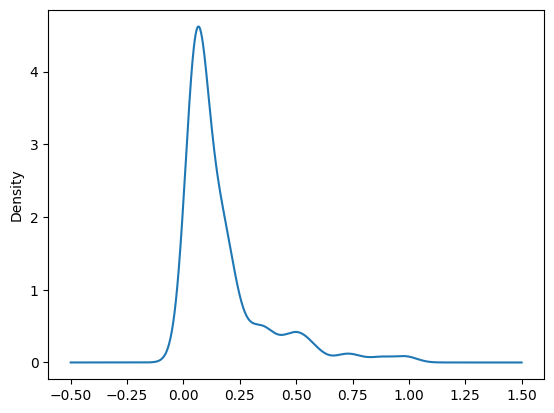

In [11]:
norm_fare.plot(kind = "kde")

<Axes: ylabel='Density'>

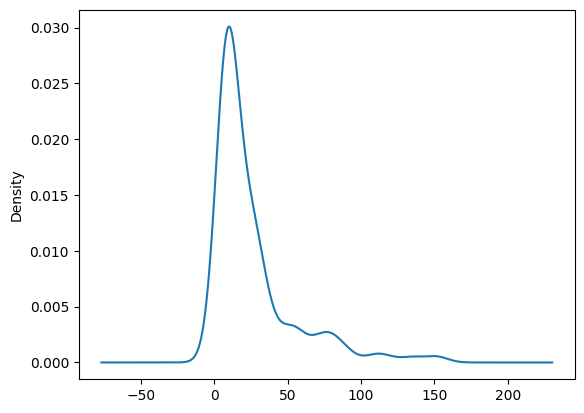

In [12]:
titanic_df.Fare.plot(kind = "kde")

### **What Min-Max Scaling Preserves:**
1. **Relative Order of Values (Monotonicity)**:  
   - If one value is greater than another before scaling, it remains greater after scaling.
   - Example: If \( x_1 < x_2 \) in the original data, then \( x'_1 < x'_2 \) after scaling.

2. **Proportional Spacing (Linear Transformation)**:  
   - The distance between values is proportionally reduced or expanded within the new scale.

3. **Feature Relationships**:  
   - If two features have a strong correlation before scaling, the correlation remains the same after scaling.

---

### **What Min-Max Scaling Does NOT Preserve:**
1. **Outlier Effects**:  
   - Since Min-Max scaling compresses all values into a fixed range (e.g., [0,1] or [-1,1]), outliers can **dominate the scaling** and distort patterns.
   - Example: If one value is an extreme outlier, all other values will be squashed closer together.

2. **Absolute Differences**:  
   - Since all values are mapped to a fixed range, differences between large and small values may lose interpretability.

3. **Gaussian Distributions**:  
   - If the original data is normally distributed, Min-Max scaling does not maintain the bell-shaped distribution.

---

### **Conclusion:**
- **For data with a uniform range and without extreme outliers**, Min-Max scaling **preserves patterns well**.
- **For data with outliers or a skewed distribution**, Min-Max scaling may **distort the structure**, and alternatives like **Z-score normalization (StandardScaler)** may be better.


In [16]:
# Sklearn

from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

scaled_data = mm_scaler.fit_transform(titanic_df)

In [17]:
pd.DataFrame(scaled_data, columns= titanic_df.columns)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,Embarked_enc
0,0.0,1.0,0.271174,0.125,0.000000,0.047243,0.0,0.0,1.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.464500,1.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.051641,0.0,1.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.346013,1.0,1.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.052456,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
862,0.0,0.5,0.334004,0.000,0.000000,0.084711,0.0,0.0,1.0,1.0
863,1.0,0.0,0.233476,0.000,0.000000,0.195487,1.0,1.0,0.0,1.0
864,0.0,1.0,0.343367,0.125,0.333333,0.152806,0.0,1.0,0.0,1.0
865,1.0,0.0,0.321438,0.000,0.000000,0.195487,1.0,0.0,1.0,0.0


2. **Z-score Normalization / StandardScaler**

   This method scales the data to have zero mean and unit variance. The formula for z-score normalization is:

```python
x_norm = (x - mean) / std
```

where `x` is the original value, `mean` and `std` are the mean and standard deviation of the data, respectively, and `x_norm` is the normalized value.